## 딥러닝으로 시작하는 컴퓨터 비전
### 3. CNN 하나씩 이해하기 (1) 1-Channel Convolution

#### 3-1. 들어가며

![](./img03/01.png)
![](./img03/02.png)

#### 학습 내용

Channel이 하나일 때 1-Layer의 Convolution 연산

CNN의 구조와 Convolution 연산이 무엇인지 알아봅시다. 그 후, 직접 Convolution 연산을 손으로 연산하여 feature map을 구해봅시다.

Filter를 이해하기

Filter의 중요성을 알아보고, 코드를 통해 다양한 Filter를 이미지에 직접 적용해 봅시다.

Channel이 하나일 때 2개 이상의 Layer에서 Convolution 연산(Padding)

Convolution 연산을 계속해서 진행하면 깊은 layer를 쌓는데 문제점이 발생하는 데 이를 해결하는 방법을 알아봅시다.

#### 학습 목표
Convolution 연산이 어떻게 실행되는지 설명할 수 있습니다.
Convolution 연산의 목적이 무엇인지를 설명할 수 있습니다.
Padding의 필요성을 설명할 수 있습니다.

[아이스브레이킹] 다양한 filter를 이미지에 적용해 보고 어떻게 연산이 되는지도 시각적으로 확인할 수 있는 블로그가 있습니다. 아래의 링크에 들어가서 이미지에 filter를 적용해 보고 느낀 점을 적어보세요.

https://setosa.io/ev/image-kernels/

#### 3-2. Channel이 하나일 때 1-Layer의 Convolution 연산

![](./img03/03.png)

Convolution 연산 3번, pooling 1번, 1D에 1차원 벡터를 만드는 Flattern 다음 MLP를 거쳐 Classification을 하는 과정을 거친다.

![](./img03/04.png)

왼쪽 행렬은 인풋, 오른쪽 행렬은 Kernal

Kernal을 인풋에 적용하는 것을 Over riding이라고 한다.

인풋데이터와 오버라이딩해서 겹치는 값을 곱하고 더해서 특정 값을 만들어 낸다.

계산 뒤 1칸을 이동하는 것을 stride라고 하며 stride가 1이면 1칸씩 이동하고 2이면 2칸씩 이동한다.

이렇게 계산된 값을 Feature map이라고 한다.

이러한 과정을 convolution 연산이라고 한다.

Q. CNN(Convolution Neural Network)의 구조를 설명해 보세요. (Convolution을 배우기 전에 Convolution Neural Network 구조를 머릿속에 정리해 보고 가면 좋을 것 같아요. 💭)

CNN 구조는 크게 Feature extraction과 Classification으로 구성됩니다. Input이 들어가면 먼저 Convolution 연산과 Pooling을 여러 번 반복하여 Feature extraction을 한 후 1D 데이터인 flatten layer로 만듭니다. 마지막으로 Fully connected layer(MLP)를 통해 classification을 합니다.

Q. Convolution 연산에 대해서 설명해 보세요.

Convolution 연산은 Input에 kernel을 over-riding하여 겹쳐지는 숫자를 곱하여 그 값을 더하는 것입니다. stride를 1로 지정하여 Convolution 연산을 반복하면 feature map이 나옵니다.

Q. 7x7 Input, 3x3 kernel, stride 1일 때 convolution 연산을 하면 어떤 크기의 feature map이 나오나요?

입력 이미지의 크기가 7x7이고, 커널(필터)의 크기가 3x3이며 스트라이드(stride)가 1이므로, Convolution 연산을 수행하면 feature map 크기는 (7-3+1) x (7-3+1) = 5 x 5 가 됩니다. 따라서, 출력 feature map의 크기는 5x5입니다.


Q. 7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요? (stride는 1)

7x7 이미지에 5x5 필터로 Convolution 연산을 하면 슬라이딩하는 윈도우(window)의 개수는 (7-5+1) x (7-5+1) = 9개 입니다. 이렇게 입력 이미지를 슬라이딩해 나가면서 합성곱 연산을 하면 9개의 값을 가지는 feature map이 생성됩니다. 이때, 스트라이드가 1이므로 feature map 크기는 (7-5+1) x (7-5+1) = 3 x 3이 됩니다. 따라서, 5x5 필터를 사용한 Convolution 연산의 결과로 3x3의 feature map이 생성됩니다.

Q. 7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요?? (stride는 2)

7x7 이미지에 5x5 필터로 Convolution 연산을 할 때 스트라이드가 2인 경우, 필터를 적용할 때마다 2씩 이동하게 됩니다. 그래서 출력 feature map의 크기 계산은 다음과 같이 됩니다: (입력 이미지 높이 - 필터 높이) / 스트라이드 + 1 = (7 - 5) / 2 + 1 = 2 / 2 + 1 = 1 + 1 = 2
(입력 이미지 너비 - 필터 너비) / 스트라이드 + 1 = (7 - 5) / 2 + 1 = 2 / 2 + 1 = 1 + 1 = 2 따라서, 출력 크기는 2x2의 feature map이 생성됩니다.

Q. 9x9 image의 데이터를 3x3의 필터로 convolution 연산을 두 번 했을 때, 연산의 결과로 나온 최종 feature map의 사이즈는 어떻게 되나요? (stride는 처음에는 2, 두번째에는 1)

두 번의 Convolution 연산을 진행하겠습니다.

첫 번째 연산:
입력 이미지 크기: 9x9
필터 크기: 3x3
스트라이드: 2

(입력 이미지 높이 - 필터 높이) / 스트라이드 + 1 = (9 - 3) / 2 + 1 = 6 / 2 + 1 = 3 + 1 = 4
(입력 이미지 너비 - 필터 너비) / 스트라이드 + 1 = (9 - 3) / 2 + 1 = 6 / 2 + 1 = 3 + 1 = 4

첫 번째 연산 결과로 나온 출력 이미지 크기는 4x4입니다.

두 번째 연산:
입력 이미지 크기: 4x4 (첫 번째 연산 결과)
필터 크기: 3x3
스트라이드: 1

(입력 이미지 높이 - 필터 높이) / 스트라이드 + 1 = (4 - 3) / 1 + 1 = 1 / 1 + 1 = 1 + 1 = 2
(입력 이미지 너비 - 필터 너비) / 스트라이드 + 1 = (4 - 3) / 1 + 1 = 1 / 1 + 1 = 1 + 1 = 2

두 번째 연산 결과로 나온 출력 이미지 크기는 2x2입니다.

그러므로 전체 연산 후 나온 최종 feature map의 사이즈는 2x2입니다.

### 3-3. Filter를 이해하기

filter의 동의어는 kernel

![](./img03/05.png)

원본이미지에 아래와 같은 값들을 컨볼루션 연산해주면 필터가 적용된 이미지가 나온다.

handcrafted feature는 사람이 직접 만든 feature이다.
(사람이 직접 손으로 만들어 냈다는 의미)

![](./img03/06.png)

렌즈가 필터의 의미

원본이미지 + 필터 -> 특징, 정보 , 패턴

![](./img03/07.png)

MLP - hidden layer 는 feature extractor 역할을 하며 이 역할은 필터가 한다.

원본 이미지가 가지고 있는 특징을 추출해주는 역할을 filter가 한다.

handcrafted feature의 한계점은 사람이 직접 한다는 것

딥러닝을 통해 머신이 알아서 filter를 찾아내도록(자동으로) 만든다.

이것이 convolution neural network의 핵심

필터를 다양하게 만들어 원본이미지가 가지는 복잡한 피쳐를 뽑아냄

Q. 딥러닝을 컴퓨터 비전 기술에 사용하기 전에 Hand-Crafted filter가 있었습니다. 과거에 사람들이 많은 노력을 들여서 filter를 찾으려고 했었던 이유는 무엇이었을까요? 또한, Hand-Crafted filter의 한계점에 대해서 설명해 보세요.

사람들은 과거 많은 노력을 들여 filter를 찾으려고 했던 이유는 filter를 많이 확보하는 것이 컴퓨터 비전의 성능을 높이는 핵심 경쟁력이기 때문입니다.

Hand-Crafted filter의 한계점은 사람이 직접 많은 노력을 들여 찾아내야 한다는 것이었습니다. 이를 대체해서 나온 것이 현재 우리가 배우고 있는 딥러닝(Deep Learning)이고, Convolution 연산입니다.

#### 코드로 Filter와 Convolution 연산 이해하기


이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요? 이미지 분석의 경우에는 'filter'라는 이름의 패턴 추출기를 사용합니다.

filter와 convolution 연산 코드를 직접 실행시키면서 filter와 convolution 연산에 대해 이해해봅시다.
아래의 귀여운 고양이 사진에 filter를 적용해볼 거예요. 😸

![](https://d3s0tskafalll9.cloudfront.net/media/images/cat_1.max-800x600.jpg)

#### 데이터 확인하기

먼저 이번에 사용할 라이브러리와 고양이 사진을 불러옵시다.
원본 RGB 이미지에는 R, G, B 3개의 채널이 있기 때문에 간단한 실습을 위해 rgb2gray 함수로 이미지를 흑백으로 변환합니다.

In [1]:
# 필요한 모듈 불러오기
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray # RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [4]:
cat = rgb2gray(imread('data/cat.jpg')) # read image

흑백 고양이 사진은 3,266개의 행과 4,899개의 열로 이루어진 1-channel 이미지입니다.
행렬 안에는 0과 1 사이의 값으로 정규화된 픽셀 값이 들어 있습니다.

In [5]:
cat.shape

(3266, 4899)

In [6]:
cat

array([[0.81598392, 0.80814078, 0.88293333, ..., 0.08751843, 0.11104784,
        0.11104784],
       [0.76500353, 0.77284667, 0.8434349 , ..., 0.06624392, 0.08977333,
        0.0936949 ],
       [0.78853294, 0.81206235, 0.84735647, ..., 0.04830275, 0.07800863,
        0.08977333],
       ...,
       [0.70269882, 0.67132627, 0.69877725, ..., 0.87116863, 0.86724706,
        0.87901176],
       [0.64753686, 0.6601349 , 0.67860392, ..., 0.89441529, 0.88265059,
        0.87480745],
       [0.64361529, 0.6601349 , 0.67468235, ..., 0.88265059, 0.87088588,
        0.86304275]])

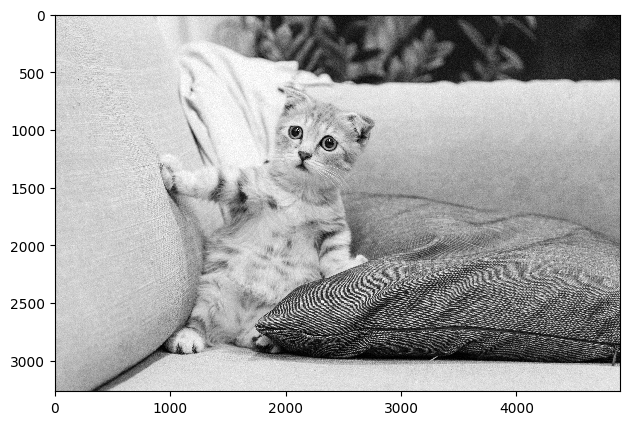

In [7]:
imshow(cat)

#### filter 적용하기
이미지를 분석할 때, 이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요?

이미지 분석의 경우에는 filter라는 이름의 패턴 추출기를 사용합니다. filter를 고양이 사진에 적용해 봅시다.

먼저 고양이 사진에 적용할 대표적인 세 가지 filter를 정의합니다. 순서대로 Edge Detection, Sharpen, Gaussian Blur filter입니다.

filter는 그냥 봤을 때는 그저 숫자 덩어리이에요. 하지만 filter를 이용해서 convolution 연산을 하게 되면, 이미지 안에 숨겨져 있던 패턴이 드러나게 됩니다. 따라서 이미지 분석에서 중요한 것은 이미지 내에 숨겨진 다양하고 복잡한 패턴을 추출해줄 수 있는 다양한 filter를 만들어 내는 것입니다.

In [8]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

각각의 filter를 고양이 이미지에 적용해 봅시다.

##### Edge Detection

In [9]:
edge_im = convolve2d(cat, edge, 'valid')

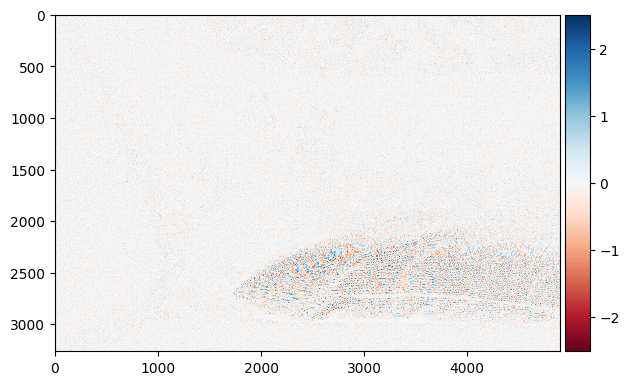

In [10]:
imshow(edge_im)

##### Sharpen

In [11]:
sharp_im = convolve2d(cat, sharpen, 'valid')

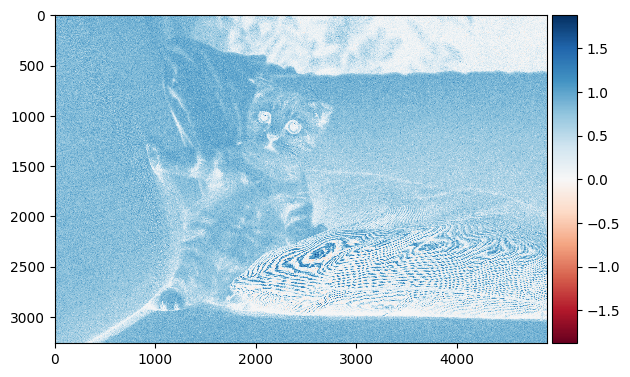

In [12]:
# Q. Sharpen filter가 적용된 이미지를 출력해 보세요.
imshow(sharp_im)

##### Gaussian Blur

In [14]:
# Q. Gaussian Blur filter를 이미지에 적용해 보세요.
blur_im = convolve2d(cat, blur, 'valid')

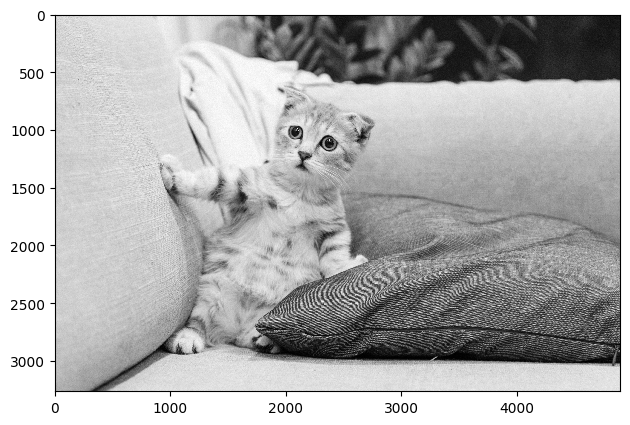

In [15]:
# Q. Gaussian Blur filter가 적용된 이미지를 출력해 보세요.
imshow(blur_im)

Q. Edge Detection, Sharpen, Gaussian Blur filter의 역할은 무엇인가요? 다양한 이미지를 통해 알아낸 사실을 적어보세요.

Edge Detection: 윤곽선을 검출하는 역할을 합니다.

Sharpen: 이미지를 선명하게 만듭니다.

Gaussian Blur filter: 영상을 부드럽게 만듭니다. 영상의 노이즈를 제거할 때 사용하기도 합니다.

### 3-4. Channel이 하나일 때 2개 이상의 Layer에서 Convolution 연산 (Padding)

![](./img03/08.png)

히든 레이어가 많으면 많을수록 다양한 패턴을 찾을 수 있다.

컨볼루션 연산을 계속할수록 feature map의 크기가 줄어든다.

그림상으로 3개의 레이어밖에 못쌓게 된다.

그래서 나온것이 padding이다.

![](./img03/09.png)
![](./img03/10.png)
![](./img03/11.png)

padding을 하면 feature map의 크기가 줄어들지 않는다.

stride 를 얼마나 증가시킬것인가, padding을 얼마나 할것인가는 hyper parameter이다.

Q. Input이 7x7이고 kernel size가 3x3일 때. layer을 최대 몇 개까지 쌓을 수 있을까요? 그렇게 생각한 이유도 함께 설명해 보세요.

컨볼루션 레이어를 최대한 많이 쌓으려면 입력 이미지의 크기가 1x1이 될 때까지 감소해야 합니다. 이때, 스트라이드를 1로 설정하면서 진행해야 더 많은 레이어를 쌓을 수 있습니다.

7x7 입력 이미지에서 스트라이드가 1인 3x3 커널을 사용하는 경우 크기 변경은 다음과 같이 진행됩니다:

1번째 레이어: 5x5 (크기 변경 계산: (7-3+1)x(7-3+1) = 5x5)
2번째 레이어: 3x3 (크기 변경 계산: (5-3+1)x(5-3+1) = 3x3)
3번째 레이어: 1x1 (크기 변경 계산: (3-3+1)x(3-3+1) = 1x1)

여기에서 3개의 컨볼루션 레이어를 쌓았을 때, 이미지 크기가 1x1이 되었습니다. 더 이상의 컨볼루션 레이어를 쌓으면 이미지 크기가 음수가 되기 때문에 불가능합니다. 따라서, 입력 크기가 7x7인 경우와 커널 크기가 3x3일 때, 최대 3개의 컨볼루션 레이어를 쌓을 수 있습니다.

Q. hidden layer의 개수가 늘어날수록 다양하고 복잡한 패턴을 찾을 수 있습니다. 어떻게 하면 더 많은 layer를 쌓을 수 있을까요? 어떤 방법을 사용하면 될까요?

더 많은 layer를 쌓을 수 있는 해결책은 padding을 사용하는 것입니다. padding은 Filter을 적용하기 전에 보존하려는 Feature map 크기에 맞게 입력 Feature Map의 좌우 끝과 상하 끝에 각각 열과 행을 추가한 뒤, 0 값을 채워 입력 Feature map 사이즈를 증가시킵니다.

이런 식으로 padding을 적용하면 깊은 layer를 쌓을 수 있습니다.

Q. input이 5x5이고 kernel size가 3x3일 때 (stride 1), output size는 어떻게 되나요? 여기 조건에서 padding을 적용해 준다는 조건을 추가하면 output size는 어떻게 되나요? (추가 조건을 주기 전과 후의 output size를 비교해 봅시다. 🤗)

먼저, 패딩이 없을 때 조건에 대해 다음과 같이 계산해 봅시다:

입력 이미지 크기: 5x5
커널 크기: 3x3
스트라이드: 1

(입력 이미지 높이 - 필터 높이) / 스트라이드 + 1 = (5 - 3) / 1 + 1 = 2 / 1 + 1 = 2 + 1 = 3
(입력 이미지 너비 - 필터 너비) / 스트라이드 + 1 = (5 - 3) / 1 + 1 = 2 / 1 + 1 = 2 + 1 = 3

패딩이 없을 때는 출력 이미지 크기가 3x3입니다.

이제 패딩을 적용한 경우를 고려해 봅시다. 패딩을 적용하기 위해 가장 자주 사용되는 패딩 방식인 "same"패딩을 적용하면 입력 이미지와 출력 이미지의 크기가 동일해집니다.

"same"패딩에서 출력 이미지 크기:
입력 이미지 높이와 너비를 같게 유지하기 때문에 출력 이미지 크기도 5x5입니다.

따라서 패딩을 적용하지 않은 경우에는 출력 이미지 크기가 3x3이고, 패딩을 적용한 경우에는 출력 이미지 크기가 5x5입니다.

![](./img03/12.png)

### 종합 문제

Q. 딥러닝을 이용한 이미지 분석의 핵심을 한 문장으로 요약하여 적어보세요.

딥러닝을 이용한 이미지 분석의 핵심은 Convolution 연산을 통해서 이미지의 숨겨진 패턴을 찾는 자동 패턴 추출기인 filter를 학습시키는 것입니다.

Q. 이전에 직접 계산해 보았던 feature map 크기 연산을 공식으로 작성해 볼까요?

패딩과 스트라이드를 적용하고, 입력데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래와 같이 작성할 수 있습니다.

• (H, W) : 입력 크기(input size)
• (FH, FW) : 필터의 크기(filter size)
• (OH, OW) : 출력 크기(output size)
• P : 패딩(padding)
• S : 스트라이드(stride)

$$OH = \frac{H + 2P - FH}{S} + 1$$
$$OW = \frac{W + 2P - FW}{S} + 1$$

Q. 이미 배운 3개의 filter 외에 다른 filter는 무엇이 있을까요?

다양한 이미지 처리에서 사용되는 추가적인 필터들을 소개합니다:

1. Emboss 필터: 이미지에 입체감을 부여해 윤곽선을 강조하는 데 사용됩니다. 이 필터는 원본 이미지의 주변 픽셀 값과의 차이를 적용하여, 음영 효과를 주는 것처럼 보이게 만듭니다.

2. Laplacian 필터: 이미지의 경계선을 강조하는 데 사용되는 필터로, 이중 차분(double derivative)을 계산하여 이미지의 경계 및 팽창된 영역을 찾을 수 있습니다.

3. Box Blur 필터: 이미지를 스무딩하는 데 사용되는 간단한 수식을 기반으로 하는 필터입니다. 이 필터에서는 선형적인 평균을 사용하여 연산이 수행되고, 연산은 원본 이미지 주위의 모든 픽셀에 동일한 가중치를 부여하여 처리됩니다.

4. Median 필터: 이미지에서 노이즈를 감소하는 데 사용되는 노이즈 제거 필터입니다. 이 필터에서는 커널 내의 픽셀 값들을 정렬하여 중앙값을 사용하는 방식으로 작동합니다. 이로 인해 이미지의 전체적인 특성은 유지되면서 일부 노이즈가 제거됩니다.

5. Sobel 필터: Edge Detection을 수행하는 데 사용되는 필터 중 하나로, 수평 및 수직 경계선의 변화를 감지합니다. 이 필터는 이미지의 x축과 y축 방향의 픽셀 강도의 변화를 찾아 윤곽을 추출합니다.

6. Prewitt 필터: Sobel 필터와 비슷하게 엣지 검출에 사용되는 필터입니다. 다만, Sobel 필터처럼 대각선 방향의 픽셀 변화를 고려하지 않고 수평 및 수직 차이만으로 경계선을 감지합니다.

이러한 필터들은 각각 다양한 목적으로 이미지 처리에 사용되며, 이미지 향상, 경계선 검출, 노이즈 제거, 스무딩 등의 작업을 수행하게 됩니다. 여러 필터를 조합하여 원하는 결과를 얻을 수도 있습니다.